In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd

from math import asinh
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


def run_kmeans(data, clusters, sample_weight=None):
    """Start k-means clustering.

    Parameters
    ----------
    data : pandas.DataFrame
        Input dataframe.
    clusters : int
        Number of clusters to determine
    sample_weight : array-like
        Weights per initial samples. If not set - all the weights are equal
    Returns
    -------
    sklearn.cluster.KMeans
        Class object that has multiple useful properties:
            - labels_
            - cluster_centers_
            - inertia_ (sum of distances to cluster centers)
    """
    kmeans = KMeans(n_clusters=clusters, random_state=0x1234, max_iter=3000)
    kmeans.fit_transform(data, sample_weight=sample_weight)
    return kmeans


def run_pca_transform(data, n_components=None):
    """Do PCA.

    Parameters
    ----------
    data : pandas.DataFrame
        Input dataframe.
    n_components
        Number of components to keep. if n_components is not set all components are kept
    Returns
    -------
    sklearn.decomposition.PCA
        Class object that has multiple useful properties:
            - explained_variance_ratio_
            - singular_values_
            - components_
    numpy.ndarray
        transformed values
    """
    pca = PCA(n_components=n_components)
    result = pca.fit_transform(data)
    return pca, result


def scale(data):
    """Do standard scaling transformation.

    Parameters
    ----------
    data : pandas.DataFrame
        Input dataframe.
    Returns
    -------
    sklearn.preprocessing.StandardScaler
        scaler for later scaling
    numpy.ndarray
        transformed values
    """
    scaler = StandardScaler()
    result = scaler.fit_transform(data.values)
    return scaler, result


def calculate_pearson(data):
    """Calculate standard (pearson) correlation coefficient.

    Parameters
    ----------
    data : pandas.DataFrame
        Input dataframe.
    Returns
    -------
    pandas.DataFrame
        Pearson correlation coefficients
    """
    result = data.corr(method='pearson')
    result.columns = data.columns
    result.set_index(data.columns)
    result.index.name = 'PCC'

    return result

def plot_PCA(pca_data, num_clusters):
    _, ax = plt.subplots(figsize=(9, 6))
    ax.set_title(f"PCA representation for {num_clusters} clusters", fontsize=14)

    for cluster in range(num_clusters):
        subset = pca_data[pca_data['color'] == cluster]
        ax.scatter(subset['PCA0'], subset['PCA1'],
                       c=plt.cm.rainbow(subset['color'].div(num_clusters - 1)),
                       label=cluster,
                       s=1)
    ax.set_xlabel("PCA component 0")
    ax.set_ylabel("PCA component 1")
    plt.ylim()
    plt.legend()
    
def generate_f1_score(pca_data, num_clusters):
    temp = pd.concat([pca_data[['color']], raw_data[['H2O']]], axis=1)
    translation = {}
    for current in range(num_clusters):
        translation[current] = temp[temp['color'] == current]['H2O'].mode()
    temp['predicted'] = temp['color'].apply(lambda x: translation[x])
    
    precision, _, f1, _ = precision_recall_fscore_support(temp['H2O'].astype(str), temp['predicted'].astype(str), 
                                                  average='macro', zero_division=0)
    return f1

In [2]:
dirname = r'C:\Andre\onedrive\Drive C\Academico\Doutorado\Python'
filenames = ['0.0.csv', '2.5.csv', '5.0.csv']

datalist = []
for filename in filenames:
    datalist.append(pd.read_csv(os.path.join(dirname, filename)).drop(['Device Time'], axis=1))

raw_data = pd.concat(datalist, ignore_index=True)
calculate_pearson(raw_data).to_csv(os.path.join(dirname, 'PCC.csv'))
raw_data.to_csv(os.path.join(dirname, 'raw_data.csv'))

scaled_data = pd.DataFrame(scale(raw_data)[1], columns=raw_data.columns)
scaled_data.to_csv(os.path.join(dirname, 'scaled_data.csv'))
scaled_data.head()

,Engine Load(%),Fuel Trim Bank 1 Long Term(%),Fuel Trim Bank 1 Short Term(%),Fuel trim Bank 1 Sensor 1(%),O2 Bank 1 Sensor 1 Voltage(V),Absolute Throttle Position B(%),Relative Throttle Position(%),Engine RPM(rpm),Intake Air Temperature(Â°C),Engine Coolant Temperature(Â°C),H2O
0,1.158555,-0.769134,-1.189628,-1.891690,1.199949,4.347952,4.340648,0.979107,-0.003837,-1.681054,-0.938938
1,1.158555,-0.684133,-0.226419,0.617746,1.006788,-0.041189,0.069532,1.244656,-0.003837,-1.681054,-0.938938
2,0.462580,-0.684133,0.134784,0.617746,1.324125,4.347952,4.340648,0.721255,-0.133713,-1.681054,-0.938938
3,0.578576,-0.004122,-1.550831,-1.891690,-0.179776,-0.517725,-0.523679,0.844408,-0.133713,-1.796999,-0.938938
4,-0.620047,-0.344127,-0.346820,0.020262,-0.869639,0.034053,0.029984,0.386433,-0.133713,-1.681054,-0.938938


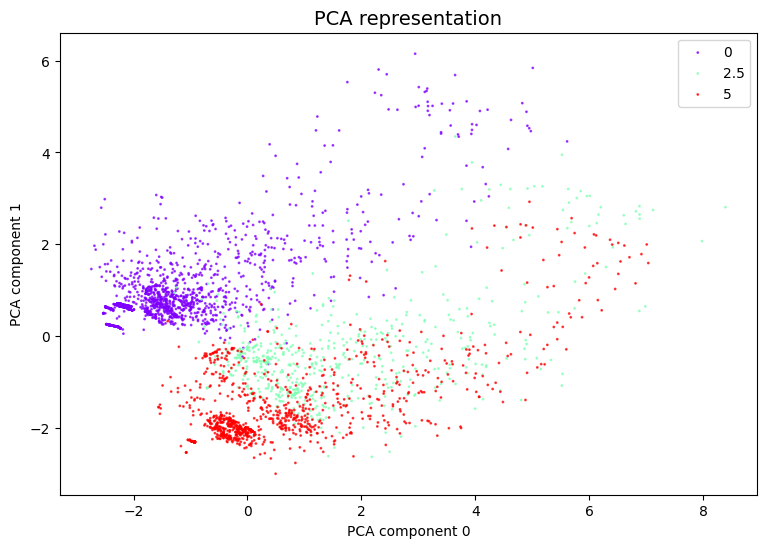

In [3]:
%matplotlib inline

component_names = ['PCA0', 'PCA1', 'PCA2', 'PCA3']

pca_object, pca_result = run_pca_transform(scaled_data, n_components=len(component_names)) 
pca_data = pd.DataFrame(pca_result, columns=component_names)
pca_data['color'] = raw_data['H2O']

_, ax = plt.subplots(figsize=(9, 6))
ax.set_title("PCA representation", fontsize=14)

for water in [0, 2.5, 5]:
    subset = pca_data[pca_data['color'] == water]
    ax.scatter(subset['PCA0'], subset['PCA1'],
                   c=plt.cm.rainbow(subset['color'].div(5)),
                   label=water,
                   alpha=0.7,
                   s=1)
ax.set_xlabel("PCA component 0")
ax.set_ylabel("PCA component 1")
plt.legend()

<Axes: >

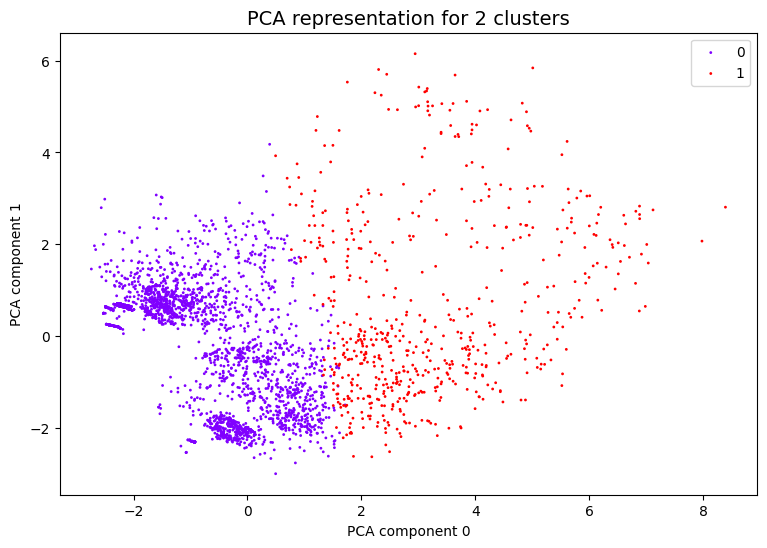

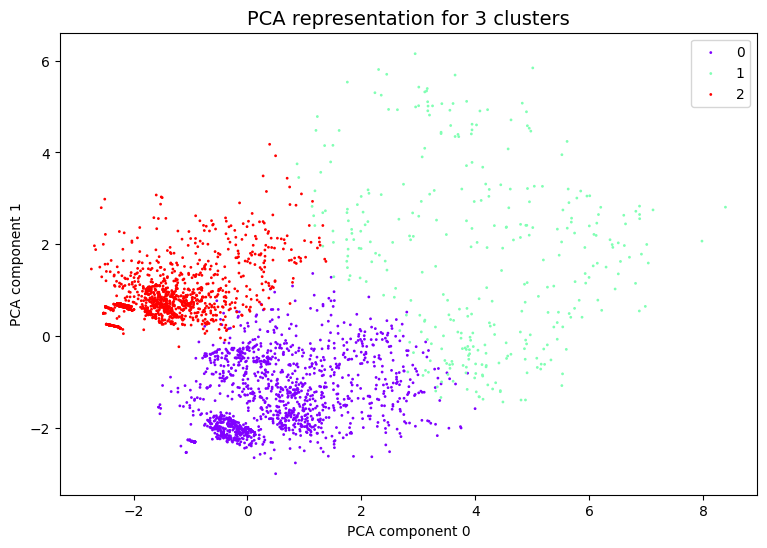

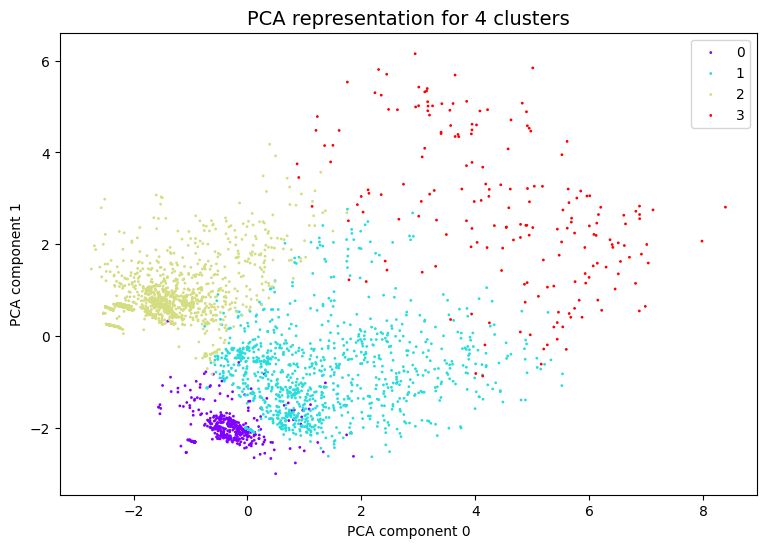

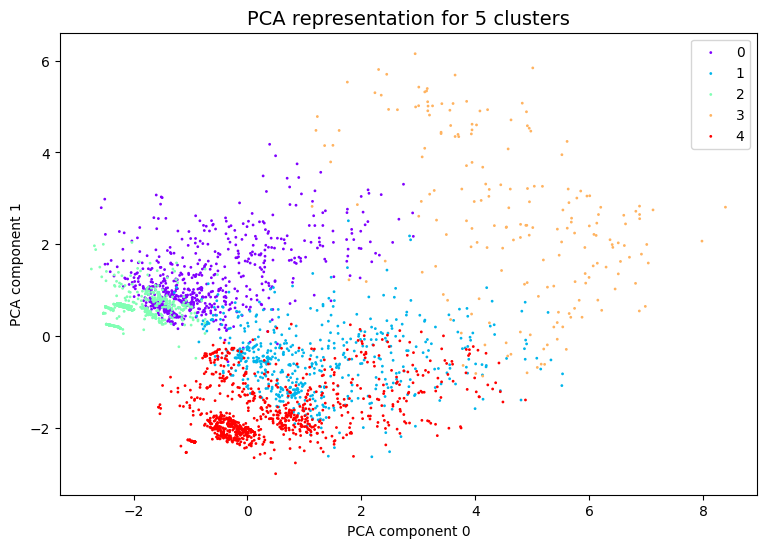

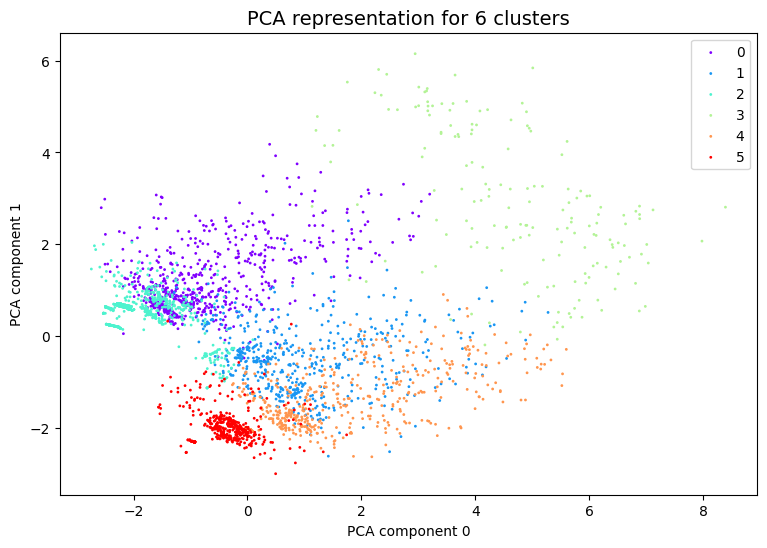

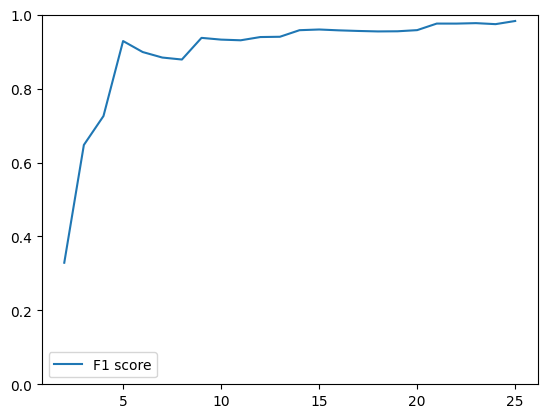

In [4]:
f1_scores = {}
for num_clusters in range(2, 26):
    kmeans_object = run_kmeans(scaled_data, num_clusters)
    
    pca_data['color'] = kmeans_object.labels_
    if num_clusters < 7:
        plot_PCA(pca_data, num_clusters)
    
    f1_scores[num_clusters] = generate_f1_score(pca_data, num_clusters)

pd.DataFrame.from_dict(f1_scores, orient='index', columns=['F1 score']).plot(ylim=(0., 1))

In [5]:
components = pd.DataFrame(pca_object.components_, columns=raw_data.columns)
components

,Engine Load(%),Fuel Trim Bank 1 Long Term(%),Fuel Trim Bank 1 Short Term(%),Fuel trim Bank 1 Sensor 1(%),O2 Bank 1 Sensor 1 Voltage(V),Absolute Throttle Position B(%),Relative Throttle Position(%),Engine RPM(rpm),Intake Air Temperature(Â°C),Engine Coolant Temperature(Â°C),H2O
0,0.395049,-0.118602,0.357552,0.343860,0.194053,0.327114,0.331146,0.367689,-0.282205,-0.242746,0.236027
1,0.261592,-0.308468,-0.353799,-0.356992,0.020524,0.358672,0.363147,0.161566,0.205788,0.063734,-0.500343
2,-0.062307,-0.098604,-0.265798,-0.284339,0.086622,-0.226081,-0.228065,0.192888,-0.530356,-0.621436,-0.140008
3,-0.210997,-0.277689,0.008400,0.152183,-0.758158,0.228461,0.213380,-0.313849,-0.216339,-0.192201,0.019101
